#### P. JASWANTH KUMAR
#### 230968014
#### WEEK 7

In [38]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional

2025-09-19 14:59:34.550317: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-19 14:59:34.779509: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-19 14:59:35.351002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [33]:
test = pd.read_csv("Test.csv")
train = pd.read_csv("Train.csv")
valid = pd.read_csv("Valid.csv")

In [34]:
test_df

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [35]:
def text_processing():
    text = text.lower()
    
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    text = text.translate(str.maketrans('', '', string.punctuation))

    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    corrected_words = [str(TextBlob(word).correct()) for word in words]
    
    return " ".join(corrected_words)

In [36]:
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

train["clean"] = train["text"].astype(str).apply(clean_text)
valid["clean"] = valid["text"].astype(str).apply(clean_text)
test["clean"] = test["text"].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to /home/mca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


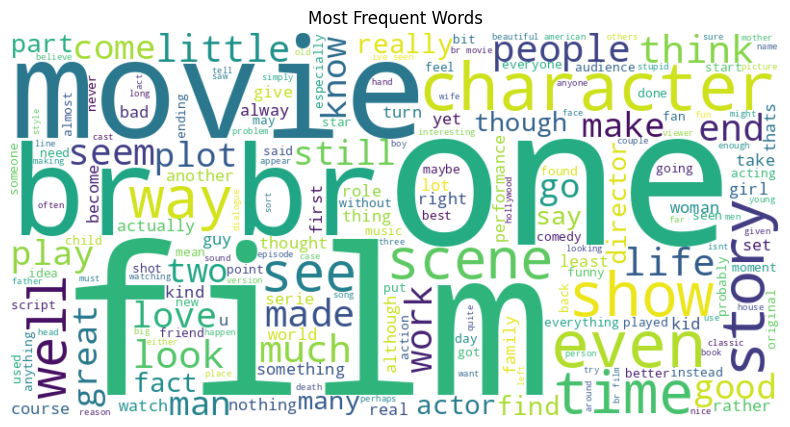

In [39]:
def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(train["clean"], "Most Frequent Words")

In [40]:
def get_top_ngrams(texts, n=2, top=20):
    tokens = " ".join(texts).split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    counter = Counter(ngrams)
    return counter.most_common(top)

print("Top Bigrams:", get_top_ngrams(train["clean"], 2))

Top Bigrams: [(('br', 'br'), 11357), (('look', 'like'), 2343), (('br', 'film'), 2184), (('br', 'movie'), 2177), (('ever', 'seen'), 2034), (('ive', 'seen'), 1783), (('special', 'effect'), 1764), (('dont', 'know'), 1633), (('itbr', 'br'), 1600), (('even', 'though'), 1560), (('main', 'character'), 1519), (('one', 'best'), 1503), (('movie', 'like'), 1388), (('year', 'old'), 1371), (('moviebr', 'br'), 1367), (('br', 'one'), 1290), (('filmbr', 'br'), 1268), (('movie', 'ever'), 1222), (('see', 'movie'), 1216), (('horror', 'movie'), 1216)]


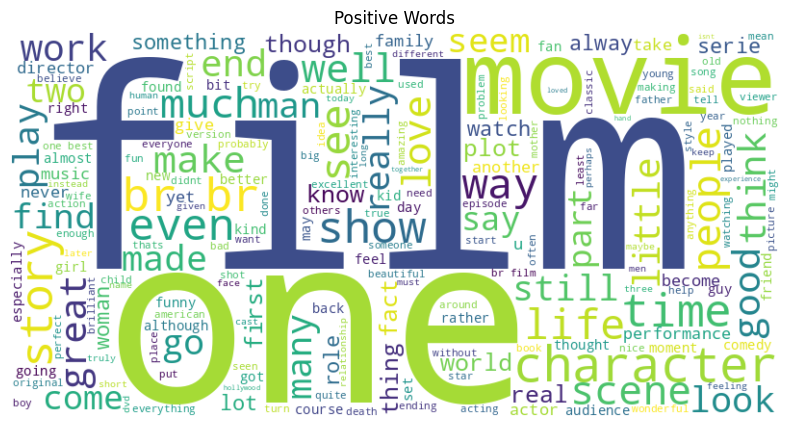

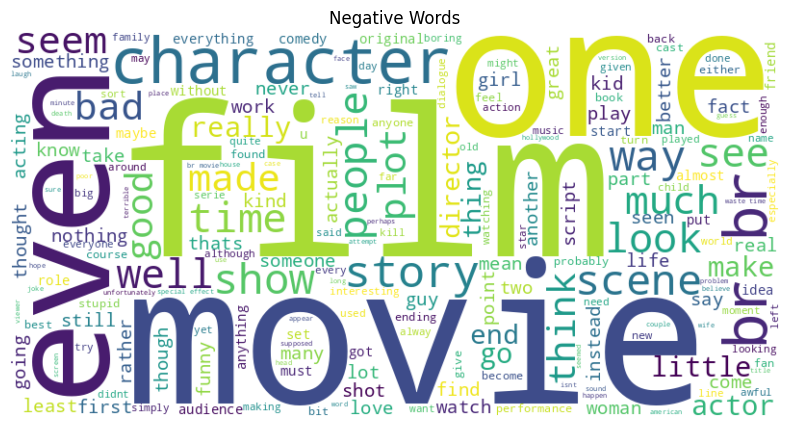

In [42]:
pos_text = train[train["label"]==1]["clean"]
neg_text = train[train["label"]==0]["clean"]
plot_wordcloud(pos_text, "Positive Words")
plot_wordcloud(neg_text, "Negative Words")

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train["clean"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train["clean"]), maxlen=200)
X_valid = pad_sequences(tokenizer.texts_to_sequences(valid["clean"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test["clean"]), maxlen=200)

y_train = train["label"].values
y_valid = valid["label"].values
y_test = test["label"].values

In [45]:
model1 = Sequential([
    Embedding(10000, 128, input_length=200),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation="sigmoid")
])

In [46]:
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=64)


Epoch 1/20
625/625 [==============================] - 37s 57ms/step - loss: 0.3847 - accuracy: 0.8331 - val_loss: 0.2991 - val_accuracy: 0.8844
Epoch 2/20
625/625 [==============================] - 19s 31ms/step - loss: 0.2479 - accuracy: 0.9043 - val_loss: 0.3194 - val_accuracy: 0.8650
Epoch 3/20
625/625 [==============================] - 16s 26ms/step - loss: 0.1864 - accuracy: 0.9312 - val_loss: 0.2985 - val_accuracy: 0.8798
Epoch 4/20
625/625 [==============================] - 13s 21ms/step - loss: 0.1383 - accuracy: 0.9506 - val_loss: 0.3346 - val_accuracy: 0.8766
Epoch 5/20
625/625 [==============================] - 13s 21ms/step - loss: 0.1018 - accuracy: 0.9646 - val_loss: 0.4021 - val_accuracy: 0.8672
Epoch 6/20
625/625 [==============================] - 12s 20ms/step - loss: 0.0727 - accuracy: 0.9761 - val_loss: 0.4676 - val_accuracy: 0.8662
Epoch 7/20
625/625 [==============================] - 12s 19ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.4979 - val_accuracy:

In [47]:
model2 = Sequential([
    Embedding(10000, 128, input_length=200),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(GRU(32, return_sequences=True)),
    Bidirectional(GRU(16)),
    Dense(1, activation="sigmoid")
])

In [48]:

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model2.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=64)


Epoch 1/20
625/625 [==============================] - 60s 89ms/step - loss: 0.3587 - accuracy: 0.8440 - val_loss: 0.3096 - val_accuracy: 0.8826
Epoch 2/20
625/625 [==============================] - 39s 62ms/step - loss: 0.2261 - accuracy: 0.9129 - val_loss: 0.3357 - val_accuracy: 0.8804
Epoch 3/20
625/625 [==============================] - 36s 57ms/step - loss: 0.1692 - accuracy: 0.9376 - val_loss: 0.3220 - val_accuracy: 0.8792
Epoch 4/20
625/625 [==============================] - 34s 55ms/step - loss: 0.1311 - accuracy: 0.9541 - val_loss: 0.3902 - val_accuracy: 0.8712
Epoch 5/20
625/625 [==============================] - 34s 54ms/step - loss: 0.1014 - accuracy: 0.9660 - val_loss: 0.3796 - val_accuracy: 0.8648
Epoch 6/20
625/625 [==============================] - 34s 54ms/step - loss: 0.0722 - accuracy: 0.9783 - val_loss: 0.4483 - val_accuracy: 0.8726
Epoch 7/20
625/625 [==============================] - 34s 54ms/step - loss: 0.0613 - accuracy: 0.9815 - val_loss: 0.4991 - val_accuracy:

In [49]:
my_reviews = [
    "The movie was fantastic with great acting!",
    "I hated the film, it was boring and too long.",
    "A masterpiece, beautifully directed.",
    "Terrible movie, waste of time.",
    "Absolutely loved it, would watch again.",
    "The plot was weak and predictable.",
    "Amazing soundtrack and visuals.",
    "The acting was poor and unconvincing.",
    "It was an average film, not great but not bad either.",
    "One of the best movies I have seen this year!"
]

my_clean = [clean_text(r) for r in my_reviews]
my_seq = pad_sequences(tokenizer.texts_to_sequences(my_clean), maxlen=200)
preds = model1.predict(my_seq)
pred_labels = (preds > 0.5).astype(int).flatten()

df_eval = pd.DataFrame({"Review": my_reviews, "Predicted Sentiment": pred_labels})
print(df_eval)

1/1 [==============================] - 0s 359ms/step
                                              Review  Predicted Sentiment
0         The movie was fantastic with great acting!                    1
1      I hated the film, it was boring and too long.                    0
2               A masterpiece, beautifully directed.                    1
3                     Terrible movie, waste of time.                    0
4            Absolutely loved it, would watch again.                    0
5                 The plot was weak and predictable.                    0
6                    Amazing soundtrack and visuals.                    1
7              The acting was poor and unconvincing.                    0
8  It was an average film, not great but not bad ...                    1
9      One of the best movies I have seen this year!                    1


In [50]:
my_clean = [clean_text(r) for r in my_reviews]
my_seq = pad_sequences(tokenizer.texts_to_sequences(my_clean), maxlen=200)
preds = model2.predict(my_seq)
pred_labels = (preds > 0.5).astype(int).flatten()

df_eval = pd.DataFrame({"Review": my_reviews, "Predicted Sentiment": pred_labels})
print(df_eval)

1/1 [==============================] - 1s 1s/step
                                              Review  Predicted Sentiment
0         The movie was fantastic with great acting!                    1
1      I hated the film, it was boring and too long.                    0
2               A masterpiece, beautifully directed.                    1
3                     Terrible movie, waste of time.                    0
4            Absolutely loved it, would watch again.                    0
5                 The plot was weak and predictable.                    0
6                    Amazing soundtrack and visuals.                    1
7              The acting was poor and unconvincing.                    0
8  It was an average film, not great but not bad ...                    0
9      One of the best movies I have seen this year!                    1
